<a href="https://colab.research.google.com/github/noviaayualmawati/MachineLearningTask/blob/main/Magang/sentimen_gojek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import nltk

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer


import re
#import nltk

In [ ]:
df = pd.read_csv('ojol_review.csv')

In [ ]:
df.head()

,review,rate
0,Sangat kecewa. Kecewa sekali. Udh top up. Mau ...,1
1,Ga niat ngasih promo sialan temen udh pake ref...,1
2,Kalau sistemnya rata begini apa bedanya yg raj...,1
3,"Ongkosnya da mahal, minimal 16rb..... Sekarang...",1
4,Tolol anjing..!!!! Aplikasi yang katanga karya...,1


In [ ]:
#  Preprocessing menggunakan Sastrawi
# Inisialisasi Stemmer dan Stopword Remover
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_factory = StopWordRemoverFactory()
stopword = stop_factory.create_stop_word_remover()

# Fungsi preprocessing
def preprocess_text(text):
    text = text.lower()  # Ubah menjadi huruf kecil
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    #text = stopword.remove(text)  # Hapus stop words
    text = stemmer.stem(text)  # Lakukan stemming
    return text


df['cleaned_review'] = df['review'].apply(preprocess_text)

In [ ]:
print(df[['review', 'cleaned_review']].head())

                                              review  \
0  Sangat kecewa. Kecewa sekali. Udh top up. Mau ...   
1  Ga niat ngasih promo sialan temen udh pake ref...   
2  Kalau sistemnya rata begini apa bedanya yg raj...   
3  Ongkosnya da mahal, minimal 16rb..... Sekarang...   
4  Tolol anjing..!!!! Aplikasi yang katanga karya...   

                                      cleaned_review  
0  sangat kecewa kecewa sekali udh top up mau di ...  
1  ga niat ngasih promo sial temen udh pake reff ...  
2  kalau sistem rata begini apa beda yg rajin eng...  
3  ongkos da mahal minimal rb sekarang saya alih ...  
4  tolol anjing aplikasi yang katanga karya anak ...  


In [ ]:
#  Menentukan label sentimen berdasarkan rate
def get_sentiment(rate):
    if rate >= 4:
        return 'positive'
    else:
        return 'negative'

df['sentiment'] = df['rate'].apply(get_sentiment)

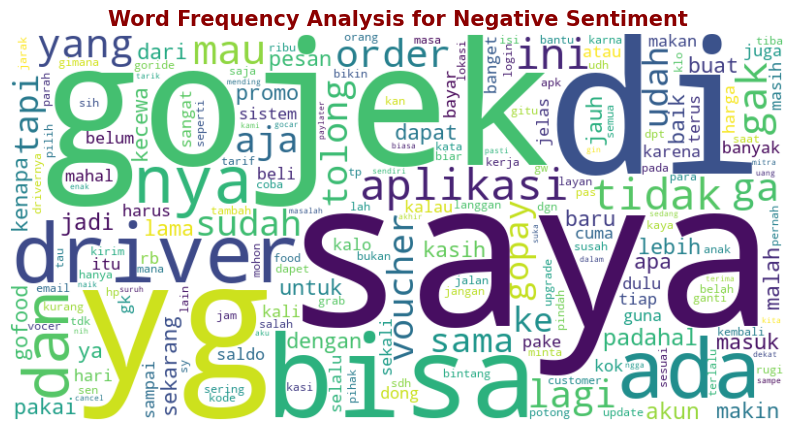

In [ ]:
# 1. Filter ulasan berdasarkan sentimen negatif
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# 2. Gabungkan semua ulasan negatif menjadi satu string
combined_reviews = " ".join(negative_reviews)

# 3. Gunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Menghapus kata umum (stop words)
X = vectorizer.fit_transform([combined_reviews])

# 4. Hitung frekuensi kata
sum_words = X.sum(axis=0)

# 5. Buat daftar kata dengan frekuensi
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# 6. Buat visualisasi WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words_freq))

# 7. Tampilkan WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Frequency Analysis for Negative Sentiment', fontsize=15, fontweight='bold', color='darkred')
plt.show()

Text(0.5, 1.0, 'Word Frequency Analysis for Positive Sentiment')

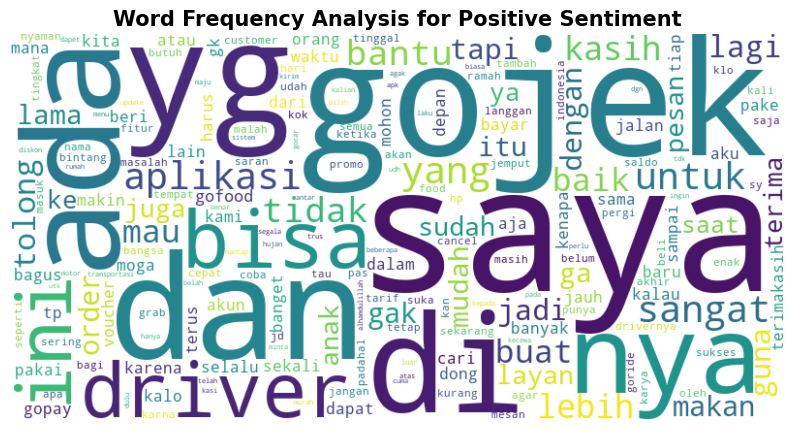

In [ ]:
# 1. Filter ulasan berdasarkan sentimen positif
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']

# 2. Gabungkan semua ulasan positif menjadi satu string
combined_positive_reviews = " ".join(positive_reviews)

# 3. Gunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer_positive = CountVectorizer(stop_words='english')  # Menghapus kata umum (stop words)
X_positive = vectorizer_positive.fit_transform([combined_positive_reviews])

# 4. Hitung frekuensi kata
sum_words_positive = X_positive.sum(axis=0)

# 5. Buat daftar kata dengan frekuensi
words_freq_positive = [(word, sum_words_positive[0, idx]) for word, idx in vectorizer_positive.vocabulary_.items()]
words_freq_positive = sorted(words_freq_positive, key=lambda x: x[1], reverse=True)

# 6. Buat visualisasi WordCloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words_freq_positive))

# 7. Tampilkan WordCloud untuk sentimen positif
plt.figure(figsize=(10,6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('Word Frequency Analysis for Positive Sentiment', fontsize=15, fontweight='bold')


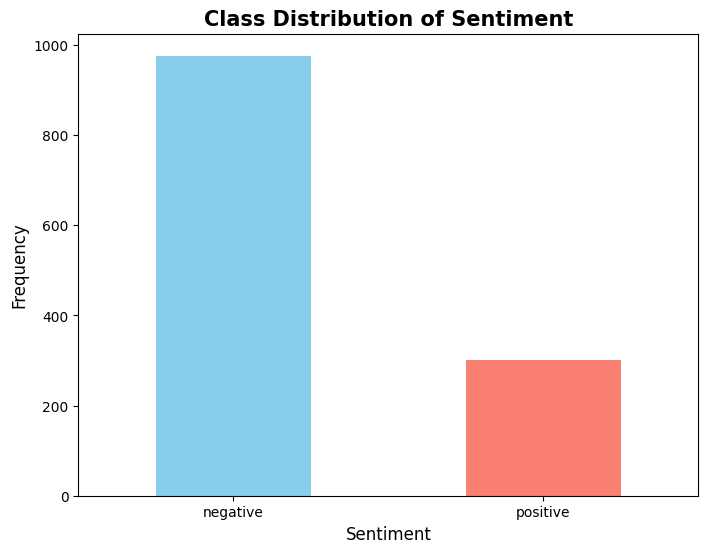

In [ ]:
# 1. Hitung jumlah data untuk setiap kelas sentimen
sentiment_counts = df['sentiment'].value_counts()

# 2. Visualisasikan distribusi kelas sentimen dengan bar plot
plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Sentiment', fontsize=15, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 5. Memisahkan fitur dan label
X = df['cleaned_review']  # Fitur adalah ulasan yang sudah di-preprocess
y = df['sentiment']  # Label adalah sentimen (positive/negative)

# 6. Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Mengubah teks menjadi fitur numerik menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 8. Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# 9. Evaluasi model
y_pred = model.predict(X_test_vectorized)

# 10. Menampilkan hasil evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.828125
Laporan Klasifikasi:
               precision    recall  f1-score   support

    negative       0.84      0.96      0.90       198
    positive       0.75      0.36      0.49        58

    accuracy                           0.83       256
   macro avg       0.79      0.66      0.69       256
weighted avg       0.82      0.83      0.80       256



In [ ]:
# 11. Fungsi untuk memprediksi sentimen dari ulasan baru
def predict_review_sentiment(new_review):
    # Preprocessing ulasan baru
    cleaned_review = preprocess_text(new_review)
    # Mengubah ulasan baru menjadi vektor numerik
    vectorized_review = vectorizer.transform([cleaned_review])
    # Prediksi sentimen
    prediction = model.predict(vectorized_review)
    # Mengembalikan prediksi dalam bentuk label (positive/negative)
    return prediction[0]

# 13. Memprediksi sentimen pada seluruh dataset
df['predicted_sentiment'] = model.predict(vectorizer.transform(df['cleaned_review']))

# 14. Mencetak hasil dengan sentimen asli dan prediksi
print("\nHasil Prediksi Sentimen:")
print(df[['cleaned_review', 'rate', 'sentiment', 'predicted_sentiment']].head(10))  # Menampilkan 10 hasil pertama



Hasil Prediksi Sentimen:
                                      cleaned_review  rate sentiment  \
0  sangat kecewa kecewa sekali udh top up mau di ...     1  negative   
1  ga niat ngasih promo sial temen udh pake reff ...     1  negative   
2  kalau sistem rata begini apa beda yg rajin eng...     1  negative   
3  ongkos da mahal minimal rb sekarang saya alih ...     1  negative   
4  tolol anjing aplikasi yang katanga karya anak ...     1  negative   
5  saya tau kalau rating itu sangat riskan emosio...     5  positive   
6  aplikasi gila gw akun premium sdh thn lbh dpt ...     1  negative   
7  gojek emang oke bagai driver aku sih gak muluk...     5  positive   
8  promonya bisa gagal yah padahal sudh belanja i...     1  negative   
9  kecewa saya padahal udah sering go food go rid...     1  negative   

  predicted_sentiment  
0            negative  
1            negative  
2            negative  
3            negative  
4            negative  
5            positive  
6            

In [ ]:
df.head()

,review,rate,cleaned_review,sentiment,predicted_sentiment
0,Sangat kecewa. Kecewa sekali. Udh top up. Mau ...,1,sangat kecewa kecewa sekali udh top up mau di ...,negative,negative
1,Ga niat ngasih promo sialan temen udh pake ref...,1,ga niat ngasih promo sial temen udh pake reff ...,negative,negative
2,Kalau sistemnya rata begini apa bedanya yg raj...,1,kalau sistem rata begini apa beda yg rajin eng...,negative,negative
3,"Ongkosnya da mahal, minimal 16rb..... Sekarang...",1,ongkos da mahal minimal rb sekarang saya alih ...,negative,negative
4,Tolol anjing..!!!! Aplikasi yang katanga karya...,1,tolol anjing aplikasi yang katanga karya anak ...,negative,negative


In [ ]:
from imblearn.over_sampling import SMOTE

# Menggunakan bigram dan unigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Terapkan SMOTE pada data yang sudah di-vectorize
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.828125
Laporan Klasifikasi:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89       198
    positive       0.61      0.66      0.63        58

    accuracy                           0.83       256
   macro avg       0.75      0.77      0.76       256
weighted avg       0.83      0.83      0.83       256



In [ ]:
from sklearn.svm import SVC  # Impor SVC dari sklearn.svm
from sklearn.linear_model import LogisticRegression

In [ ]:
# Lakukan train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan bigram dan unigram
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Terapkan SMOTE pada data yang sudah di-vectorize
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Latih model SVM
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred_svm = model_svm.predict(X_test_tfidf)
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print("Laporan Klasifikasi SVM:\n", classification_report(y_test, y_pred_svm))

Akurasi SVM: 0.85546875
Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

    negative       0.86      0.97      0.91       198
    positive       0.82      0.47      0.59        58

    accuracy                           0.86       256
   macro avg       0.84      0.72      0.75       256
weighted avg       0.85      0.86      0.84       256



In [ ]:
# Latih model Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred_lr = model_lr.predict(X_test_tfidf)
print("Akurasi Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Laporan Klasifikasi Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Akurasi Logistic Regression: 0.859375
Laporan Klasifikasi Logistic Regression:
               precision    recall  f1-score   support

    negative       0.89      0.94      0.91       198
    positive       0.74      0.59      0.65        58

    accuracy                           0.86       256
   macro avg       0.81      0.76      0.78       256
weighted avg       0.85      0.86      0.85       256



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # Untuk SVM
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)
print("Best parameters for SVM:", grid_search.best_params_)


Best parameters for SVM: {'C': 10, 'kernel': 'linear'}


In [ ]:
# Latih model SVM dengan parameter terbaik
best_svm_model = SVC(C=10, kernel='linear', random_state=42)
best_svm_model.fit(X_train_smote, y_train_smote)

# Prediksi dan evaluasi
y_pred_best_svm = best_svm_model.predict(X_test_tfidf)
print("Akurasi SVM dengan parameter terbaik:", accuracy_score(y_test, y_pred_best_svm))
print("Laporan Klasifikasi SVM dengan parameter terbaik:\n", classification_report(y_test, y_pred_best_svm))


Akurasi SVM dengan parameter terbaik: 0.859375
Laporan Klasifikasi SVM dengan parameter terbaik:
               precision    recall  f1-score   support

    negative       0.86      0.98      0.92       198
    positive       0.87      0.45      0.59        58

    accuracy                           0.86       256
   macro avg       0.86      0.71      0.75       256
weighted avg       0.86      0.86      0.84       256



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.91025641 0.94855305 0.93890675 0.91639871 0.93569132]


In [ ]:
y_pred_final = model.predict(X_test_tfidf)
print("Final accuracy on test data:", accuracy_score(y_test, y_pred_final))
print("Final classification report:\n", classification_report(y_test, y_pred_final))


Final accuracy on test data: 0.828125
Final classification report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89       198
    positive       0.61      0.66      0.63        58

    accuracy                           0.83       256
   macro avg       0.75      0.77      0.76       256
weighted avg       0.83      0.83      0.83       256

